In [8]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from PIL import Image

<function matplotlib.pyplot.show(*args, **kw)>

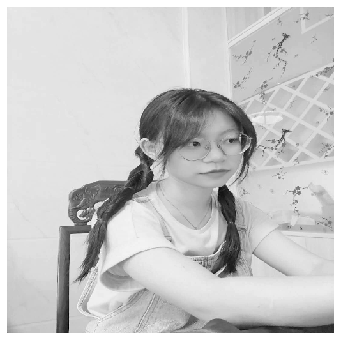

In [14]:
myim = Image.open("D:/TOOL/jupyterworksapce/torch_study/pytorch深度学习入门与实战/chouchou.jpg")
myim = myim.resize((512,512))
# myim = cv2.resize(myim,(512,512))
myimgray = np.array(myim.convert("L"), dtype=np.float32)
plt.figure(figsize=(6,6))
plt.imshow(myimgray, cmap=plt.cm.gray)
plt.axis("off")
plt.show

In [15]:
imh,imw = myimgray.shape
myimgray_t = torch.from_numpy(myimgray.reshape(1, 1, imh, imw))
myimgray_t.shape

torch.Size([1, 1, 512, 512])

卷积后尺寸： torch.Size([2, 508, 508])


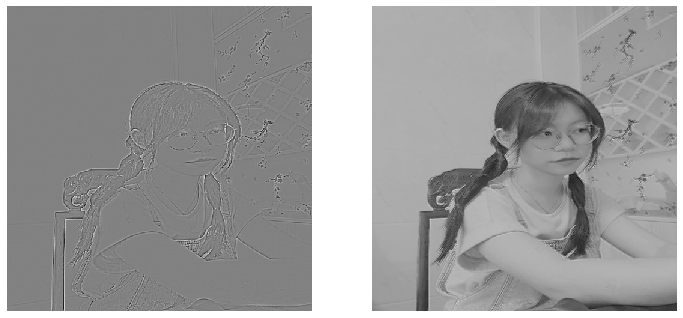

In [32]:
kersize = 5
ker = torch.ones(kersize, kersize, dtype=torch.float32)*-1
ker[2, 2] = 24
ker = ker.reshape((1, 1, kersize, kersize))
#卷积操作
conv2d = nn.Conv2d(1, 2, (kersize, kersize), bias=False)
#设置卷积时用的核
conv2d.weight.data[0] = ker
#对灰度图做卷积操作
imconv2dout = conv2d(myimgray_t)
#卷积后对图像进行维度压缩
imconv2dout_im = imconv2dout.data.squeeze()
print("卷积后尺寸：", imconv2dout_im.shape)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(imconv2dout_im[0], cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(imconv2dout_im[1], cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [33]:
print(ker)

tensor([[[[-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., 24., -1., -1.],
          [-1., -1., -1., -1., -1.],
          [-1., -1., -1., -1., -1.]]]])


In [34]:
#最大值池化
maxpool2 = nn.MaxPool2d(2, stride=2)
pool2_out = maxpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
pool2_out.shape

torch.Size([1, 2, 254, 254])

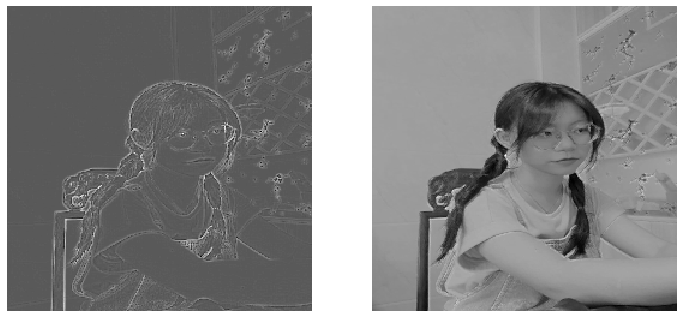

In [36]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data, cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data, cmap=plt.cm.gray)
plt.axis("off")
plt.show()


In [37]:
avgpool2 = nn.AvgPool2d(2, stride=2)
pool2_out = avgpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
pool2_out.shape

torch.Size([1, 2, 254, 254])

<function matplotlib.pyplot.show(*args, **kw)>

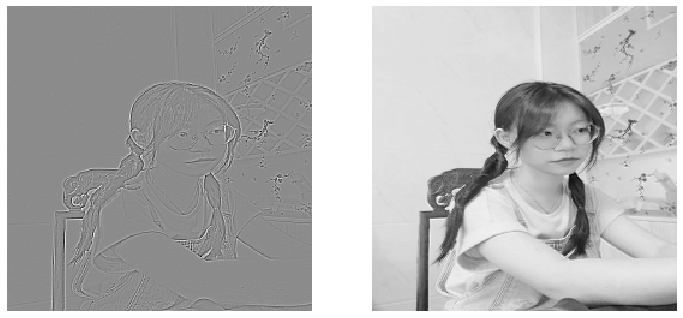

In [38]:
#可视化
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show

In [39]:
AdaAvgpool2 = nn.AdaptiveAvgPool2d(output_size=(100, 100))
pool2_out = AdaAvgpool2(imconv2dout)
pool2_out_im = pool2_out.squeeze()
pool2_out.shape

torch.Size([1, 2, 100, 100])

<function matplotlib.pyplot.show(*args, **kw)>

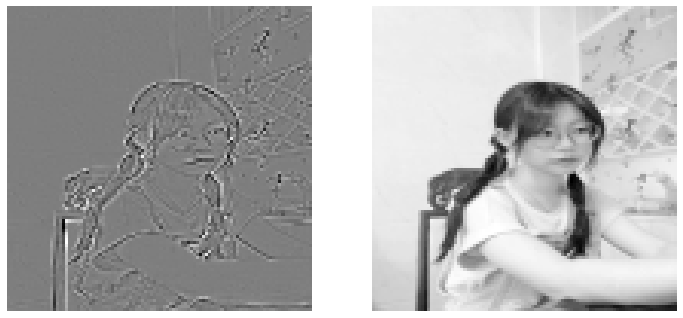

In [40]:
#可视化
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(pool2_out_im[0].data,cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(pool2_out_im[1].data,cmap=plt.cm.gray)
plt.axis("off")
plt.show

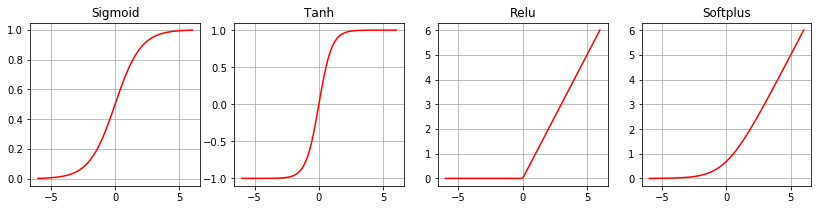

In [43]:
x = torch.linspace(-6, 6, 100)
sigmoid = nn.Sigmoid()
ysigmoid = sigmoid(x)
tanh = nn.Tanh()
ytanh = tanh(x)
relu = nn.ReLU()
yrelu = relu(x)
softplus = nn.Softplus()
ysoftplus = softplus(x)
plt.figure(figsize=(14,3))
plt.subplot(1,4,1)
plt.plot(x.data.numpy(),ysigmoid.data.numpy(),"r-")
plt.title("Sigmoid")
plt.grid()
plt.subplot(1,4,2)
plt.plot(x.data.numpy(),ytanh.data.numpy(),"r-")
plt.title("Tanh")
plt.grid()
plt.subplot(1,4,3)
plt.plot(x.data.numpy(),yrelu.data.numpy(),"r-")
plt.title("Relu")
plt.grid()
plt.subplot(1,4,4)
plt.plot(x.data.numpy(),ysoftplus.data.numpy(),"r-")
plt.title("Softplus")
plt.grid()